# Create t-statistic and retrieve p-value

In [2]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
dir()

[1] "adequatepop.csv"                     
 [2] "adequatewater.csv"                   
 [3] "femaleControlsPopulation.csv"        
 [4] "femalemiceweights.csv"               
 [5] "inadequate.csv"                      
 [6] "mice_pheno.csv"                      
 [7] "MicephenotypeCLTapproximations.ipynb"
 [8] "Rbasics.ipynb"                       
 [9] "rpractmice.ipynb"                    
[10] "waterterpenestatusRosmarinus.csv"    
[11] "WorkingWithPvaluesAndTstat.ipynb"

In [4]:
dat <- read.csv('femalemiceweights.csv')
#filter values according to diet types, 
#strip unnecessary labeling ('bodyweight') 
#and convert values to numeric vectors
control <- filter(dat,Diet=='chow') %>% select(Bodyweight) %>% unlist
treatment <- filter(dat,Diet=='hf') %>% select(Bodyweight) %>% unlist


#diff var == observed effect size
diff <- mean(treatment) - mean(control)
diff

#Standard error of the sample average
se <- sd(control)/sqrt(length(control))
se

#Standard error of diff
sediff <- sqrt(var(treatment)/length(treatment) + var(control)/length(control))
sediff

[1] 3.020833

[1] 0.8725323

[1] 1.469867

In [5]:
#Divide a random var. by its Standard Error, new random var. will have SE of 1
tstat <- diff/sediff
tstat

[1] 2.055174

In [7]:
#If the p-value is less than 0.05 then it is statistically significant
righttail <- 1 - pnorm(abs(tstat))
lefttail <- pnorm(-abs(tstat))
pval <- lefttail + righttail
pval
#Keep in mind that we are using a small sample size so the CLT may be flawed


[1] 0.0398622

In [8]:
#If distribution of the population is normal then 
#we can determine t-statistic without using CLT
#small sample sizes can make this problematic in assuming/determining normal
#distribution for the population
#Assume that given we are working with weights the distribution is normal

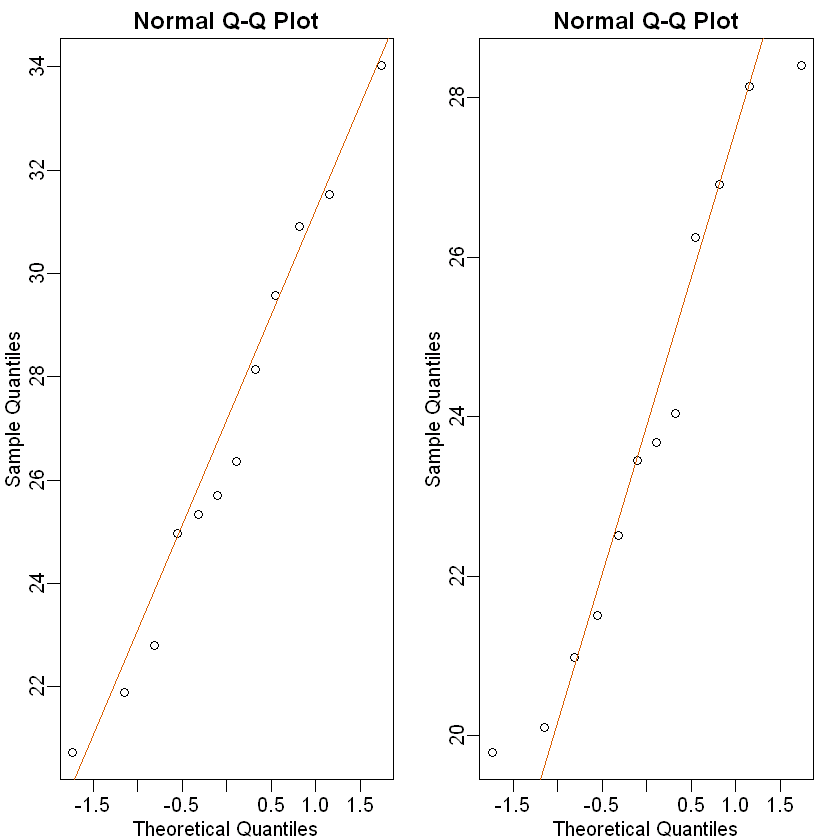

In [11]:
library(rafalib)
mypar(1,2)

qqnorm(treatment)
qqline(treatment,col=2)

qqnorm(control)
qqline(control,col=2)

In [12]:
t.test(treatment,control)


	Welch Two Sample t-test

data:  treatment and control
t = 2.0552, df = 20.236, p-value = 0.053
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04296563  6.08463229
sample estimates:
mean of x mean of y 
 26.83417  23.81333 


In [14]:
result <- t.test(treatment,control)
result$p.value

[1] 0.05299888

In [15]:
#The p-value is bigger than with the CLT approximation.  
#in calculating t-statistic the CLT takes the denominator
#of tstat to be fixed (as it should be largely fixed with large sample sizes)
#With a smaller sample size, there is an increase in variation

# t-test in practice

In [16]:
dir()

[1] "adequatepop.csv"                     
 [2] "adequatewater.csv"                   
 [3] "femaleControlsPopulation.csv"        
 [4] "femalemiceweights.csv"               
 [5] "inadequate.csv"                      
 [6] "mice_pheno.csv"                      
 [7] "MicephenotypeCLTapproximations.ipynb"
 [8] "Rbasics.ipynb"                       
 [9] "rpractmice.ipynb"                    
[10] "waterterpenestatusRosmarinus.csv"    
[11] "WorkingWithPvaluesAndTstat.ipynb"

In [17]:
#NOTE:Arguments for t.test function can be data.frame, 
#conversion into numeric vectors isnt required

dat <- read.csv('mice_pheno.csv')
control <- filter(dat,Diet=='chow') %>% select(Bodyweight)
treatment <- filter(dat,Diet=='hf') %>% select(Bodyweight)
t.test(treatment,control)



	Welch Two Sample t-test

data:  treatment and control
t = 7.1932, df = 735.02, p-value = 1.563e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.231533 3.906857
sample estimates:
mean of x mean of y 
 30.48201  27.41281 


In [19]:
res <- t.test(treatment,control)
res$p.value

[1] 1.562941e-12